In [111]:
# loading required libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

transaction_data = pd.read_csv("D:/QVI/QVI_transaction_data.csv")
customer_data = pd.read_csv("D:/QVI/QVI_purchase_behaviour.csv")

In [112]:
# Exploratory data analysis
transaction_data.info()
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

In [193]:
customer_data.isnull().sum()
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PACK_SIZE         0
BRAND_NAME        0
dtype: int64

no null values in the dataset

In [192]:
customer_data.head()
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [114]:
# Converting the DATE column to a date format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

date column is succesfully converted

In [115]:
transaction_data.head(1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0


In [116]:
# Examining the words in PROD_NAME to identify incorrect entries
product_words = pd.Series(' '.join(transaction_data['PROD_NAME'].unique()).split()).unique()
product_words

array(['Natural', 'Chip', 'Compny', 'SeaSalt175g', 'CCs', 'Nacho',
       'Cheese', '175g', 'Smiths', 'Crinkle', 'Cut', 'Chips', 'Chicken',
       '170g', 'Thinly', 'S/Cream&Onion', 'Kettle', 'Tortilla',
       'ChpsHny&Jlpno', 'Chili', '150g', 'Old', 'El', 'Paso', 'Salsa',
       'Dip', 'Tomato', 'Mild', '300g', 'Salt', '&', 'Vinegar', '330g',
       'Grain', 'Waves', 'Sweet', 'Chilli', '210g', 'Doritos', 'Corn',
       'Mexican', 'Jalapeno', 'Sour', 'Cream&Chives', '210G',
       'Sensations', 'Siracha', 'Lime', 'Twisties', '270g', 'WW', 'Thins',
       'Light&', 'Tangy', 'Original', 'Burger', 'Rings', '220g', 'NCC',
       'Cream', 'Garden', 'Chives', 'Southern', 'Cheezels', 'Box', '125g',
       'Infzns', 'Crn', 'Crnchers', 'Gcamole', '110g', 'Sea', 'And',
       'Red', 'Rock', 'Deli', 'Thai', 'Chilli&Lime', 'Pringles', 'Sthrn',
       'FriedChicken', '134g', 'Sweet&Spcy', 'BBQ', 'SR', 'Mzzrlla',
       'Originl', 'saltd', 'Sp', 'Truffle', '150G', 'Swt',
       'Chli&S/Cream175G', 

In [42]:
# Removing words with digits and special characters
product_words = [word for word in product_words if word.isalpha()]

# Counting the frequency of each wordword_counts = {}
word_counts = {}
for word in product_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sorting words by frequency in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the words and their frequencies
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

Natural: 1
Chip: 1
Compny: 1
CCs: 1
Nacho: 1
Cheese: 1
Smiths: 1
Crinkle: 1
Cut: 1
Chips: 1
Chicken: 1
Thinly: 1
Kettle: 1
Tortilla: 1
Chili: 1
Old: 1
El: 1
Paso: 1
Salsa: 1
Dip: 1
Tomato: 1
Mild: 1
Salt: 1
Vinegar: 1
Grain: 1
Waves: 1
Sweet: 1
Chilli: 1
Doritos: 1
Corn: 1
Mexican: 1
Jalapeno: 1
Sour: 1
Sensations: 1
Siracha: 1
Lime: 1
Twisties: 1
WW: 1
Thins: 1
Tangy: 1
Original: 1
Burger: 1
Rings: 1
NCC: 1
Cream: 1
Garden: 1
Chives: 1
Southern: 1
Cheezels: 1
Box: 1
Infzns: 1
Crn: 1
Crnchers: 1
Gcamole: 1
Sea: 1
And: 1
Red: 1
Rock: 1
Deli: 1
Thai: 1
Pringles: 1
Sthrn: 1
FriedChicken: 1
BBQ: 1
SR: 1
Mzzrlla: 1
Originl: 1
saltd: 1
Sp: 1
Truffle: 1
Swt: 1
Mexicana: 1
French: 1
OnionDip: 1
ChipCo: 1
Hony: 1
Soy: 1
Dorito: 1
Chp: 1
Supreme: 1
Roast: 1
Mozzarella: 1
Basil: 1
Pesto: 1
Infuzions: 1
SweetChili: 1
PotatoMix: 1
Camembert: 1
Fig: 1
Smith: 1
Mac: 1
N: 1
Honey: 1
Seasonedchicken: 1
Rib: 1
Prawn: 1
Crackers: 1
GrnWves: 1
Plus: 1
Btroot: 1
Jam: 1
Tyrrells: 1
Crisps: 1
Lightly: 1
Salt

In [117]:
# removing salsa products in the dataset as we are only interested in the chips category
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]

In [47]:
# Summarize the data to check for nulls and outliers
summary = transaction_data.describe()
summary

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


There are no nulls in the columns but product quantity appears to have an outlier
which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.

In [118]:
transaction_data[transaction_data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [119]:
transaction_data[transaction_data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0



It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.


In [120]:
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR']!=226000]

In [64]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [121]:
unq_dates = transaction_data.DATE.unique()
unq_dates.shape

(364,)

there are only 364 days,so a date is missing. lets find the missing date

In [122]:
# Create a DataFrame with the complete date range
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')
date_df = pd.DataFrame({'DATE': date_range})

# Merge the complete date range with your transaction data
combined_data = date_df.merge(transaction_data, on='DATE', how='left')

# finding the missing date
missing_dates = combined_data[combined_data['TXN_ID'].isna()]
missing_dates

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
120465,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The missing date is 25th december, which is christmas and the shops were closed. There are no outliers in the data.

In [123]:
# Determing the pack_size from the prod_name and creating the pack_size column in the transaction_data
# Extracting numeric values from product names
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)').astype(int)
transaction_data['PACK_SIZE'].value_counts()

PACK_SIZE
175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: count, dtype: int64

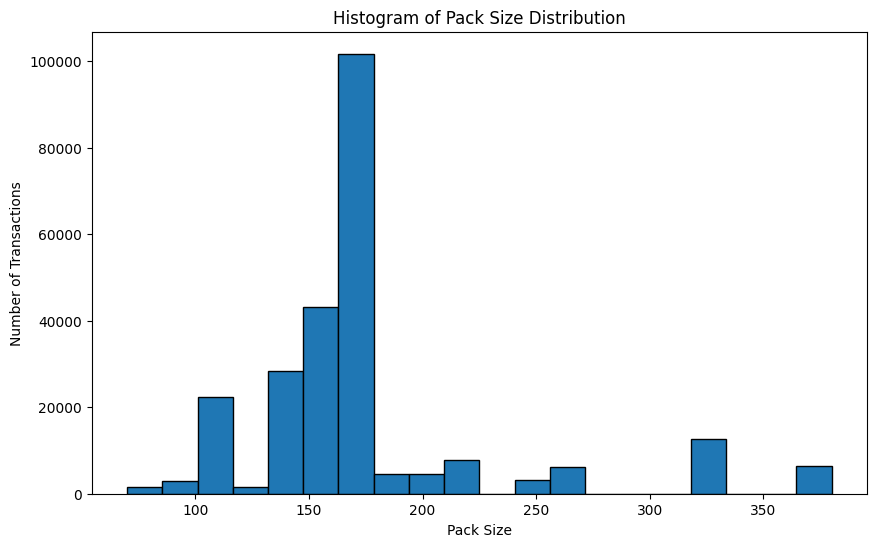

In [141]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting a histogram
plt.hist(transaction_data['PACK_SIZE'], bins=20, edgecolor='k')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Pack Size Distribution')
plt.show()


most sales are of packsieze 160 to 180g

In [131]:
# Determing the brands from the prod_name and creatind a brand_name column in transaction_data
# Spliting the product name by space and take the first part as the brand name
transaction_data['BRAND_NAME'] = transaction_data['PROD_NAME'].apply(lambda x: x.split()[0])
transaction_data['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.

In [132]:
# replacing the similar brand names
transaction_data['BRAND_NAME'] = transaction_data['BRAND_NAME'].replace({'RED': 'RRD', 'Dorito': 'Doritos'})
# verifing they got replaced
transaction_data['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Infuzions', 'Smith', 'GrnWves', 'Tyrrells',
       'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos', 'Woolworths',
       'Snbts', 'Sunbites'], dtype=object)

In [133]:
# Examining customer data
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


there isn't any outliers

In [134]:
# Merging transaction data with customer data
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

In [135]:
# Checking that merging is done correctly
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [137]:
# validating that no duplicates are created by checking the number of rows
merged_data.shape
transaction_data.shape

(246740, 10)

In [140]:
# Checking whether is any missing customer details
merged_data['PREMIUM_CUSTOMER'].isnull().sum()

0

There are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.

In [142]:
# saving the merged dataset as csv
merged_data.to_csv('QVI_merged_data.csv', index=False)

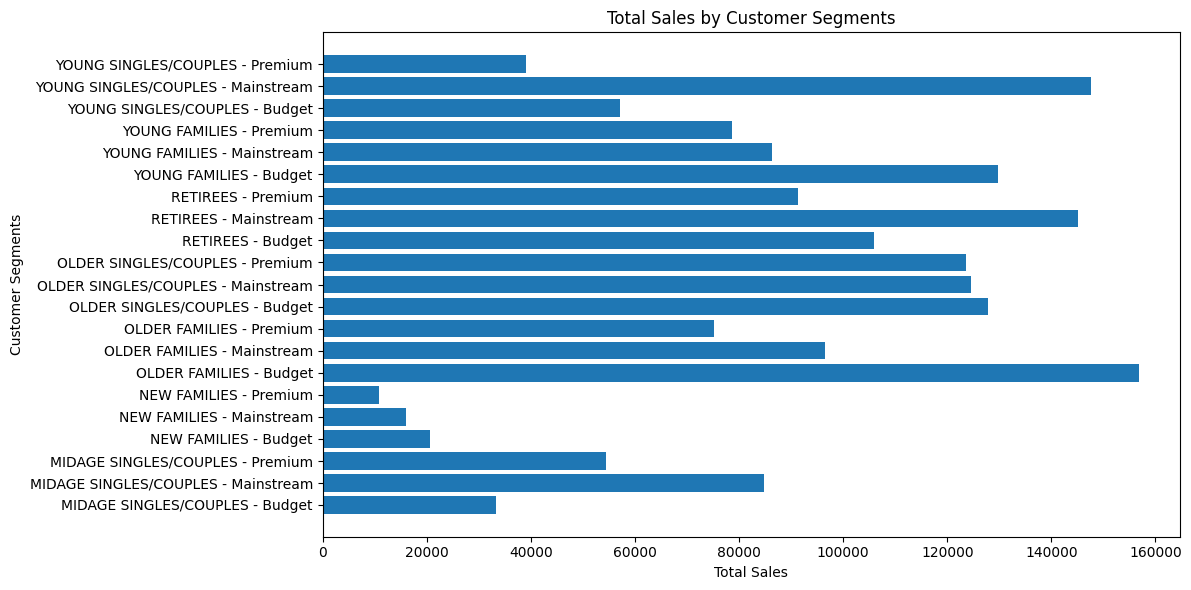

In [148]:
# Calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Plotting the split by these segments
plt.figure(figsize=(12, 6))
plt.barh(sales_by_segment['LIFESTAGE'] + ' - ' + sales_by_segment['PREMIUM_CUSTOMER'], sales_by_segment['TOT_SALES'])
plt.xlabel('Total Sales')
plt.ylabel('Customer Segments')
plt.title('Total Sales by Customer Segments')
plt.tight_layout()
plt.show()

Sales are coming mainly from older families - Budget, youngsingles/couples - Mainstream and retirees - Mainstream. 


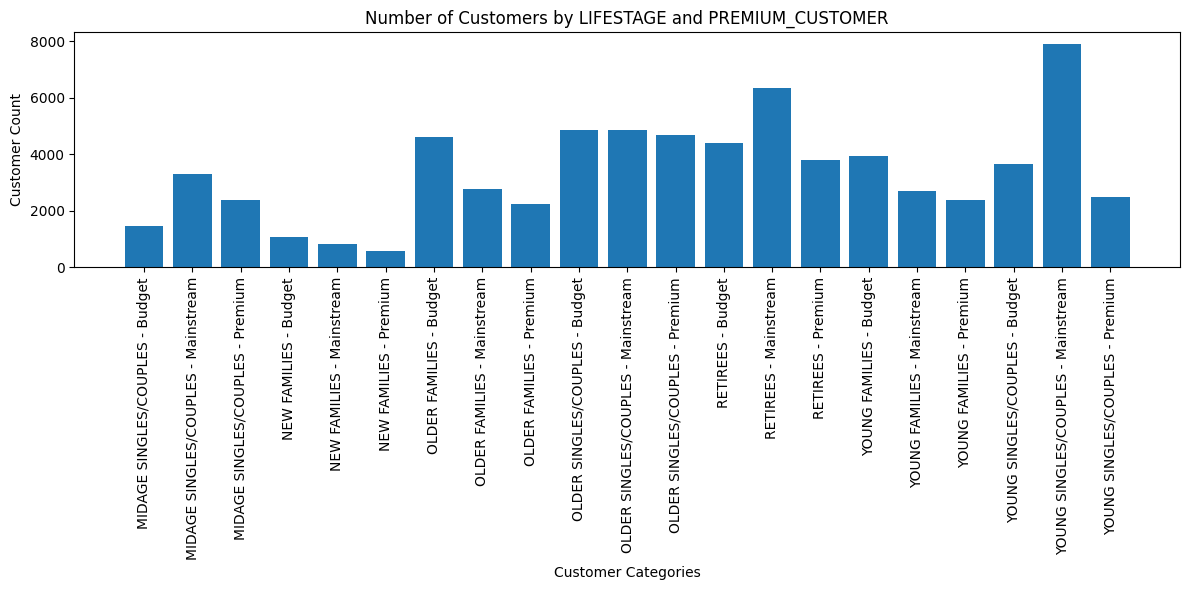

In [159]:
# Calculating the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_counts = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Creating a bar plot
categories = customer_counts['LIFESTAGE'] + ' - ' + customer_counts['PREMIUM_CUSTOMER']
plt.figure(figsize=(12, 6))
plt.bar(categories, customer_counts['LYLTY_CARD_NBR'])
plt.xlabel('Customer Categories')
plt.ylabel('Customer Count')
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

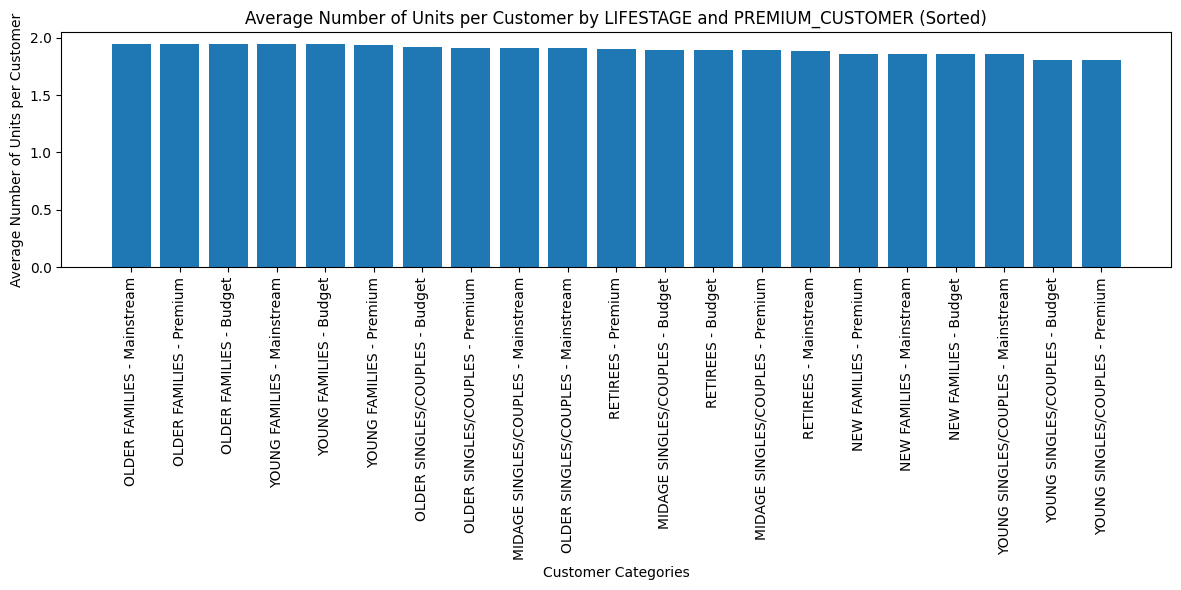

In [164]:
# Calculating the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
average_units_per_customer = (merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY']
                              .mean().reset_index())

# Sorting the data by the average number of units in descending order
sorted_data = average_units_per_customer.sort_values(by='PROD_QTY', ascending=False)

# Data for plotting
labels = sorted_data['LIFESTAGE'] + ' - ' + sorted_data['PREMIUM_CUSTOMER']
values = sorted_data['PROD_QTY']

# plotting a bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xlabel('Customer Categories')
plt.ylabel('Average Number of Units per Customer')
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER (Sorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Older families and young families in general buy more chips per customer.

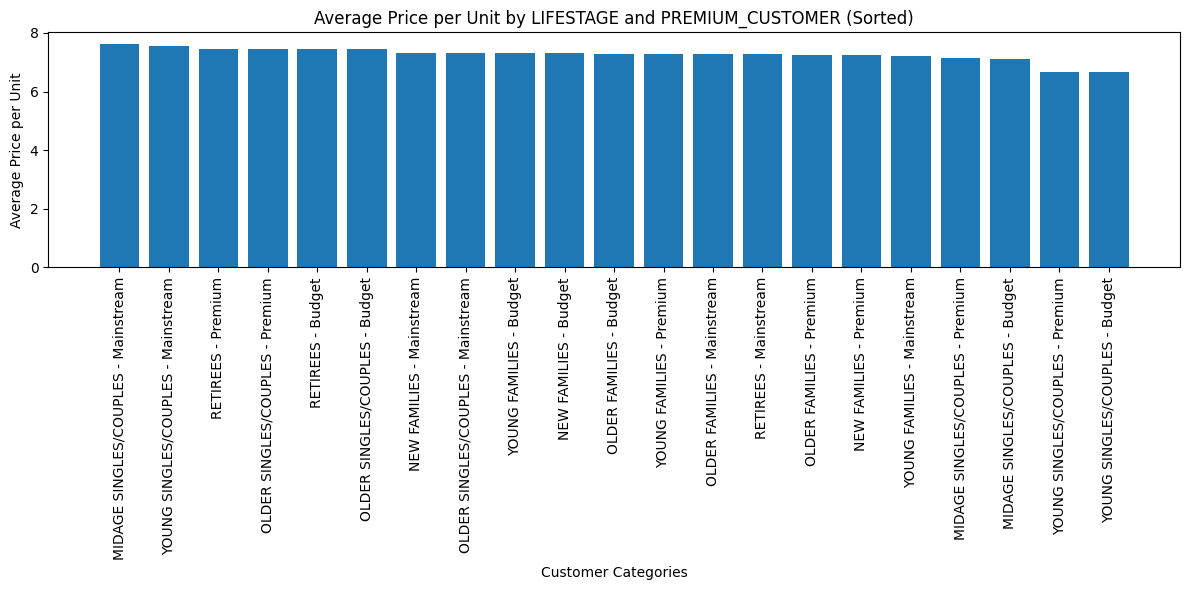

In [168]:
# Calculating the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
average_price_per_unit = (merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES']
                          .mean().reset_index())

# Sorting the data by the average number of units in descending order
sorted_data = average_price_per_unit.sort_values(by='TOT_SALES', ascending=False)

# Data for plotting
labels = sorted_data['LIFESTAGE'] + ' - ' + sorted_data['PREMIUM_CUSTOMER']
values = sorted_data['TOT_SALES']

# plotting a bar plot
plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xlabel('Customer Categories')
plt.ylabel('Average Price per Unit')
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER (Sorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

In [172]:
# performing t-test
from scipy.stats import ttest_ind

mainstream = merged_data[(merged_data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                         ((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | 
                          (merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES'))]
budget_premium = merged_data[(merged_data['PREMIUM_CUSTOMER'] == 'Budget') | 
                             (merged_data['PREMIUM_CUSTOMER'] == 'Premium') &
                             ((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | 
                              (merged_data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES'))]

t_stat, p_value = ttest_ind(mainstream['TOT_SALES'], budget_premium['TOT_SALES'])
t_stat, p_value

(21.521658577832575, 1.47172940313371e-102)

Therefore, the t-test results suggest that there is a significant difference in total sales between the "Mainstream" customers (YOUNG SINGLES/COUPLES and MIDAGE SINGLES/COUPLES) and the "Budget" and "Premium" customers in the same life stages.

In practical terms, this could mean that "Mainstream" customers in these life stages are more likely to make higher total sales compared to "Budget" and "Premium" customers in the same life stages.

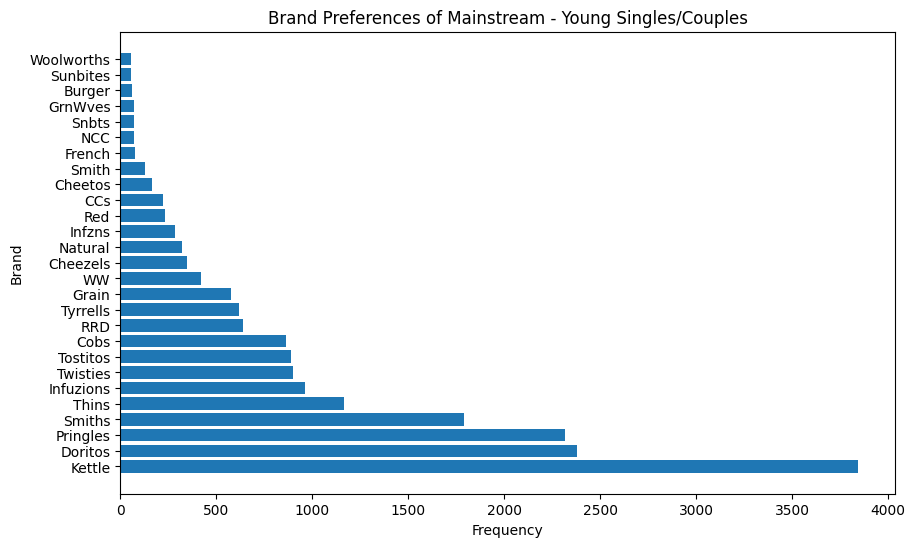

In [191]:
# Deep dive into Mainstream, young singles/couples
mainstream_young = merged_data[(merged_data['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                               (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
# Analyze brand preferences
brand_preferences = mainstream_young['BRAND_NAME'].value_counts() 
# visualising the brand preferences   
plt.figure(figsize=(10, 6))
plt.barh(brand_preferences.index, brand_preferences.values)
plt.title("Brand Preferences of Mainstream - Young Singles/Couples")
plt.xlabel("Frequency")
plt.ylabel("Brand")
plt.show()  

Among the Mainstream - Young Singles/Couples customer segment. Kettle, Doritos, and Pringles emerge as the top brand preferences. 

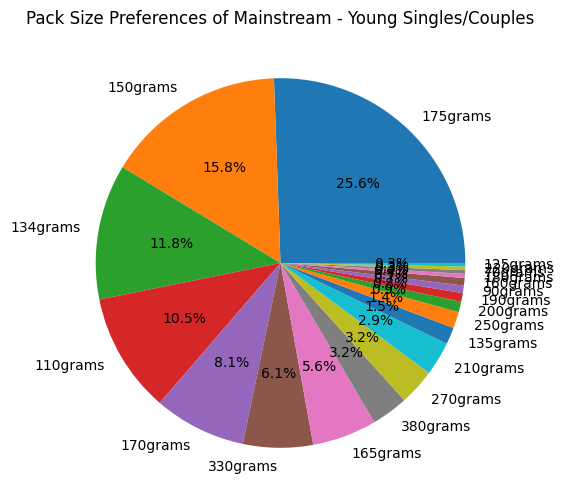

In [188]:
# Analyze pack size preferences
pack_size_preferences = mainstream_young['PACK_SIZE'].value_counts()

# Adding grams to each pack size label
labels = [f"{size}grams" for size in pack_size_preferences.index]

# Visualizing Pack Size Preferences
plt.figure(figsize=(10, 6))
plt.pie(pack_size_preferences.values, labels=labels, autopct="%1.1f%%")
plt.title("Pack Size Preferences of Mainstream - Young Singles/Couples")
plt.show()


More than half of Mainstream - Young Singles/Couples customer segment prefer the pack sizes among 175g,150g and 134g.

**INSIGHTS**
>  Mainstream - young singles/couples prefer the brands Kettle, Doritos, and Pringles in 175g,150g and 134g sized packs. By making marketing strategies and promotions towards these brands and pack sizes effectively engage and retain this customer segment, potentially leading to increased sales and brand loyalty.